In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Table
1. [Curve with variance](#curve_with_variance)
2. [Polar heatmap with points](#polar_heatmap_with_points)

<a id='curve_with_variance'></a>

In [2]:
def plot_curve_with_variance(ax, x, y, color, smooth=False):
    """
    Plot a curve with variance bounds.
    
    :param ax: axes object of matplotlib.pyplot
    :param x: x data, shape=(num_samples,)
    :param y: y data, shape=(num_samples, num_values)
    :param color: color of the curve
    :param smooth: smooth the curve or not
    :return: None
    """
    mean, var = np.mean(y, axis=1), np.var(y, axis=1)
    top, bottom = mean - var, mean + var
    
    if smooth:
        top_spl, bottom_spl = splrep(x, top), splrep(x, bottom)
        x = np.arange(np.min(x), np.max(x), 0.01)
        top, bottom = splev(x, top_spl), splev(x, bottom_spl)
        mean = (top + bottom) / 2

    ax.fill_between(x, top, bottom, alpha=0.1, color=color)
    ax.plot(x, mean, color=color)

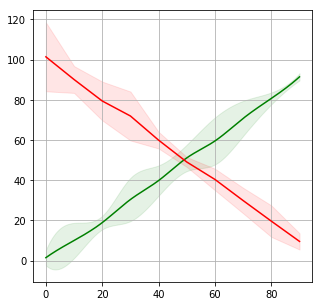

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
x = np.arange(0, 100, 10)
y = np.asarray([np.random.normal(loc=_x, scale=3, size=(10,)) for _x in x])
plot_curve_with_variance(ax, x, y, 'g', smooth=True)

x = np.arange(0, 100, 10)
y = np.asarray([np.random.normal(loc=100 - _x, scale=3, size=(10,)) for _x in x])
plot_curve_with_variance(ax, x, y, 'r', smooth=False)
plt.grid(True)
plt.show()

<a id='polar_heatmap_with_points'></a>

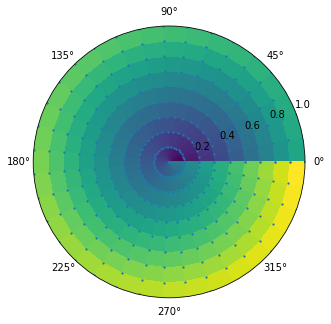

In [4]:
fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(5, 5))
rad = np.linspace(0, 1, 10)
azm = np.linspace(0, 2 * np.pi, 36)
r, th = np.meshgrid(rad, azm)
z = r * 10 + th

ax.pcolormesh(th, r, z)
ax.scatter(th, r, s=1.5)
ax.set_rmax(1)
plt.show()